# Applied Artificial Intelligence and Machine Learning Tools Final Project

🏡💰
---
In this project, I will be working with Kaggle's housing price dataset to implement classification and regression for machine learning models
- Resource: (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

My Link:
Colab: https://colab.research.google.com/drive/1ImN49UVLw-hU5Tlb2C6kBz0lQaAHup49?usp=sharing

Data: https://drive.google.com/file/d/144o2-9zqiCsIs3Pk-3O2-lFfaP7WjS-R/view


## Step 0: Import modules and necessary Libraries




In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, csv file I/O
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import os

# machine learning models
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

sns.set_style('darkgrid')

## Step 1: Download Data to Colab

Before proceeding, make sure to follow these steps:

1. Select a **regression dataset** of your choice.
2. Download the dataset to your own computer in either CSV or any other compatible format.
3. Place the dataset on **your** Google Drive.
4. Share the dataset via Google Drive and ensure it is set to "public" with anyone who has the link.
5. Extract the file ID from the sharable link and Complete the command below to download the file from your Google Drive to this Colab environment. In the Examle below, the ID is colored red:

> <font color=black>.....drive.google.com/file/d/</font><font color=red>1IijSItKzryxCz_2PWn6g316KEU7rkIfZ</font>/view?usp=drive_link







In [ ]:
# complete the gdown command so it looks like !gdown 1IijSItKzryxCz_2PWn6g316KEU7rkIfZ
!gdown 144o2-9zqiCsIs3Pk-3O2-lFfaP7WjS-R
!gdown 11qUJ1CEFWg8zrH9jiu_dtmUcXa8jOObd

Downloading...
From: https://drive.google.com/uc?id=144o2-9zqiCsIs3Pk-3O2-lFfaP7WjS-R
To: /content/train.csv
100% 461k/461k [00:00<00:00, 6.15MB/s]
Downloading...
From: https://drive.google.com/uc?id=11qUJ1CEFWg8zrH9jiu_dtmUcXa8jOObd
To: /content/test.csv
100% 451k/451k [00:00<00:00, 5.84MB/s]


If you have completed this task correctly, running the following command should display your file name.

In [ ]:
os.listdir()[1]

'train.csv'

## Step 2: Load the data file

Using pandas, load the datafile to a dataframe

**NOTE**: add test data!!!



In [ ]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
test_data
# NOTE: we can see that test data does not have the y-label

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


## Step 3: Label Distribution

Your regression label should be saved in the variable `Regression_Label`. Add necessary code to generate a clean **histogram** of the dataset **label**. Do the necassary changes in the label till the histogram is acceptable. E.g., you may need to delete records with NaNs.

In [ ]:
### BEGIN SOLUTION

Regression_Label = "SalePrice"

plt.hist(data['SalePrice'], bins=50)


### END SOLUTION


(array([  5.,  11.,  13.,  61.,  58., 126., 165., 180., 122., 130., 121.,
         78.,  61.,  64.,  49.,  36.,  36.,  25.,  13.,  25.,  16.,  11.,
          4.,  11.,   9.,   5.,   4.,   4.,   4.,   2.,   1.,   1.,   1.,
          0.,   1.,   0.,   2.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.,  49302.,  63704.,  78106.,  92508., 106910., 121312.,
        135714., 150116., 164518., 178920., 193322., 207724., 222126.,
        236528., 250930., 265332., 279734., 294136., 308538., 322940.,
        337342., 351744., 366146., 380548., 394950., 409352., 423754.,
        438156., 452558., 466960., 481362., 495764., 510166., 524568.,
        538970., 553372., 567774., 582176., 596578., 610980., 625382.,
        639784., 654186., 668588., 682990., 697392., 711794., 726196.,
        740598., 755000.]),
 <BarContainer object of 50 artists>)

## Step 4: Answer the following questions. Type your answer (Code is not needed)


### Define Your Regression Problem:

0. **Reasoning**: (a)What about this dataset excites you? Please explain (b)what this dataset is and (c)how you came across it.
1. **Features**:
   Specify the features you intend to use for the regression problem. Identify which columns in your dataset correspond to these features.

2. **Models**:
   Outline the regression models you plan to implement to address the problem.

3. **Evaluation Metrics**:
   Describe the evaluation metrics you will employ to compare and assess the performance of different regression models.



### Answer Block


0. Quick abstract
    - **a.** This is a Kaggle's free-to-join competition-level dataset, so it would be a perfect and  worthwhile one to work on as a personal project. In return, I can utilize to leverage my prior experience on data science and basic machine learning to expand my skillset before trying out a real featured competition.
    
    Some proposals from the dataset webpage include:
    - Creative feature engineering
    - Advanced regression techniques like random forest and gradient boosting

    **b.** This is a dataset on housing prices, with 79 explanatory variables describing almost every aspect of residential homes in Ames, IA.
    
    **c.** I have heard of Kaggle competition long ago as an open development platform for aspiring data scientists and machine learning engineers

1. Features consideration:
    - Some useful features that can be used for the utmost elementary regression task in the dataset would be:
        - The building class - `MSSubClass`
        - The general zoning classification - `MSZoning`
        - Lot Size in square feet - `LotArea`
        - Original construction date - `YearBuilt`
        - Home functionality rating - `Functional`
        - Overall condition rating - `OverallCond`


2. Some possible choices for regression models to implement are:
    - Polynomial Regression - Linear Regression
    - Ridge or Lasso Regression (Regression with a Regularization Term)
    - Random Forests
    - Perceptron & Neural Network Models
> **NOTE**: further research on the feature and data type, some data preprocessing and exploratory data analysis will be performed in order to identify the most suitable model


3. The proposed metric to be used in this regression task would be Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the expected sales price
(Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)


## Step 5: Modify the regression problem to classification

The dataset you've chosen is a regression dataset, where the label represents continuous variables such as car price or stock price. In this step, it's necessary to transform the regression label (continuous) into a classification label (discrete, grouped into bins).

To perform this transformation, you must categorize the numeric values into bins. For example, if the label falls within the range of 1 to 100, you can apply the following grouping scheme:

- Round numbers between 1 and 20 to category 1 (Size is 20)
- Round numbers between 20 and 30 to category 2 (Size is 10)
- Round numbers between 30 and 60 to category 3 (Size is 30)
- Round numbers between 60 and 100 to category 4 (Size is 40)

It's important to note that the different groups may not have the same length. As seen above, each group may have a different size. Grouping should be done in a way that the bins have relatively the same number of records, aiming for **balanced classes**. If classes are not defined well, it may require additional work later on to balance the dataset.

Ensure that your classification label is stored in the variable `Classification_Label`. Include the necessary code to generate a clean histogram of the dataset label.

In [ ]:
### BEGIN SOLUTION
"""
data['SalePrice_Classification'] = pd.cut(
    data['SalePrice'],
    bins = [0, 100000, 200000, 400000, 600000],
    labels = [1, 2, 3, 4],
    right=False # exclude right ends of each bins
)

plt.hist(data['SalePrice_Classification'])

Classification_Label= 'SalePrice_Classification'
"""
# keeping the discretized column for later classification problems
saleprice_clf = pd.cut(data['SalePrice'],
                    bins = [0, 100000, 200000, 400000, 600000],
                    labels = [1, 2, 3, 4],
                    right=False # exclude right ends of each bins
)
plt.hist(saleprice_clf)
### END SOLUTION


(array([114.,   0.,   0., 911.,   0.,   0., 407.,   0.,   0.,  24.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

> **HEAVY NOTE**: This discretized label features are clearly imbalanced and very roughly feature engineered to become classification labels, there will be further experimentation to choose out the correct way to transform from regression to classification

## Step 6: Answer the following questions. Type your answer (Code is not needed)


###Define Your Regression Problem:

Please note that the features you will use for the Regression and Classification will remain the same.

1. **Models**:
   Outline the classification models you plan to implement to address the problem.

2. **Evaluation Metrics**:
   Describe the evaluation metrics you will employ to compare and assess the performance of different classification models.



### Answer Block
1. The Classification Models:
    - Support Vector Machines
    - Decision Trees
    - Logistic Regression
    - kNN
2. Evaluation Metrics
    - Accuracy
    - Precision
    - Recall
    - F1 Score


# 1. Pre processing data - Data Cleansing and Data Wrangling
1. Checking if the data has missing values, N/A, invalid data, None
2. Checking for anomalies (outliers) in the features:
  - *For example, if the features have arange from 10 to 1000, a value exceeding 10,000,000 would be considered an anomaly*
3. Analyze the labels, which includes:
  - Provide the histogram of the regression labels
  - Provide the count of the numbers of the records in each class
4. Encode columns that contain text
5. Normalize numerical columns


### We will drop the "Id" column as it is not necessary for training our models

In [ ]:
X = data.drop(columns=['Id', 'SalePrice'], axis=1)
y = data['SalePrice'] # this is the regression target labels (independent variables) used for training
X.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [ ]:
# Same for test data
test_data = test_data.drop(columns=['Id'], axis=1)
test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


## 1.1. Dealing with missing values, N/A, invalid data, None
Looking through the data information with `info()` method to have an estimation of null values compared to the overall length of the rows

### Inspect the feature columns

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
# Check for null values in the dataset, set by columns
missing_columns = X.columns[X.isna().any()]
missing_columns

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [ ]:
# Count of missing values per column
missing_data_counts = X.isnull().sum()

# Filter columns with missing data
missing_data_columns = missing_data_counts[missing_data_counts > 0]

print("Missing data counts per column:\n--------------------")
print(missing_data_columns)

Missing data counts per column:
--------------------
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


### Remarks on the columns with missing values
Out of 1460 entries (rows) for training:
- *LotFrontage, Alley, MasVnrType, FireplaceQu, PoolQC, Fence, MiscFeature* hold a great number of missing values (blanks, NaNs, or other placeholders), such features are incompatible with scikit-learn estimators which assume that all values in an array are numerical, and that all have hold meaning.
---
For this type of data cleaning, we have 2 options:
1. Dropping missing data and discard the entire rows/columns containing missing values. However, this comes at the cost of losing data which may be valuable (even though incomplete). Therefore, I will drop the columns void of 50%+ missing values, these includes:

<font color='orange'> LotFrontage, Alley, MasVnrType, FireplaceQu, PoolQC, Fence, MiscFeature </font>

2. Filling in missing values, we usually refer this to as _**Imputation**_, which is usually a better strategy that infers from the known part of the data

- In general, we will go forth with imputing the data using [**SimpleImputer()**](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer) API from **sklearn**
---
References:
- **sklearn**'s Imputation of missing values: https://scikit-learn.org/stable/modules/impute.html
- other imputative models include: **IterativeImputer()**, **KNNImputer()**

In [ ]:
# Drop the mentioned column
X.drop(columns=['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)
X.shape

(1460, 72)

In [ ]:
# Define the column indices for numerical and categorical features
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

overall_features = X.columns

print("Numerical Features:", num_features)
print("Categorical Features:", cat_features)

Numerical Features: Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')
Categorical Features: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'Ce

In [ ]:
list(set(X.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [ ]:
# provide some preliminary statistics about the data
X.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


## 1.2. Label Analysis


### Checking the house price distribution by **providing the histogram of the regression target label column**
- Reference from `seaborn`'s [Visualizing distributions of data](https://seaborn.pydata.org/tutorial/distributions.html)
- `seaborn`'s [**displot()**](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot)

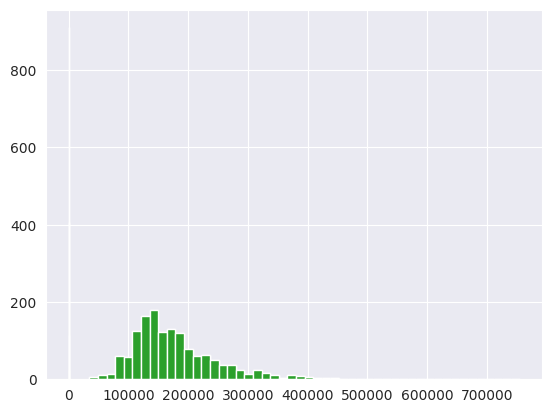

<Figure size 1200x1000 with 0 Axes>

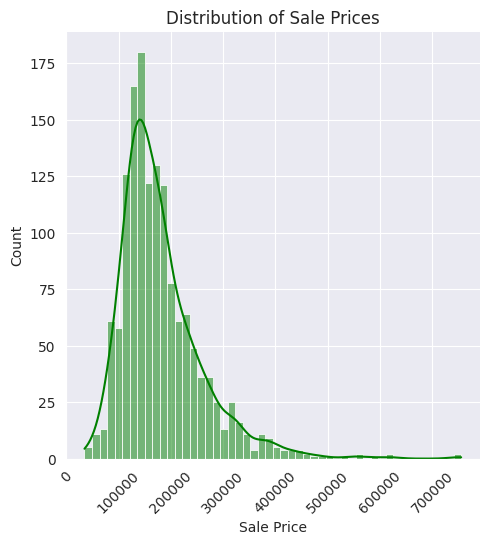

In [ ]:
plt.figure(figsize=(12, 10))
sns.displot(y, color='g', bins=50, kde=True)
# kde: kernel density estimation plot combined
# a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate

# Adjusting xticks
plt.xticks(ticks=range(0, 800000, 100000), rotation=45)  # Customize ticks and rotate labels

plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.title("Distribution of Sale Prices")  # Optional: Add a title

plt.show()

### Feature Discretization for Classification target label column
- **sklearn**'s Feature Discretization: https://scikit-learn.org/dev/auto_examples/preprocessing/plot_discretization_classification.html
- [`KBinsDiscretizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html#sklearn.preprocessing.KBinsDiscretizer)

### **Provide the count of the numbers of record of each class**

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
# we will use:
# n_bins = 4 to divide the data into 4 categories
# encode = 'ordinal' for integer value identification, will be represented as
# (0, 1, 2, 3)
# strategy = 'quantile' for ensuring the bin has the same number of data point
y_binned = est.fit_transform(y.values.reshape(-1, 1))
# y.values.reshape(-1, 1) to turn the input data into a 2D array
# since y is a 1D Pandas Series
# so we want to make it into a column vector
y_binned = y_binned.astype(int)
y_binned

array([[2],
       [1],
       [2],
       ...,
       [2],
       [1],
       [1]])

### Provide the count of the number of records for each class label
- [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

In [ ]:
y_discretized = pd.Series(y_binned.flatten())
print("Discretized labels to be used for classification training:/n")
y_discretized.value_counts()

Discretized labels to be used for classification training:/n


,count
2,496
0,487
1,477


## 1.3. Other Preprocessing steps
- Pipeline:
    - [Pipelines and composite estimators](https://scikit-learn.org/stable/modules/compose.html)
- Imputation for missing data
    - `SimpleImputer`
    - `IterativeImputer`
- Encoding for categorical data types
    - [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html): one benefit of using one-hot encoding is to eliminate any inherent ordinality of a dataset, which may cause biased predictions
    - [`OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder)
    - [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
    - [Comparing Target Encoder with Other Encoders](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
- Normalization for all numerical data types
    - Z-score normalization: [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
    - Min-max normalization: [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [ ]:
encoder = LabelEncoder()

for col in cat_features:

  if X[col].dtype == 'object':

    X[col] = encoder.fit_transform(X[col])


In [ ]:
# Define the preprocessing steps for each type of data
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # fill missing value with the median, we can also try mean
    ('scaler', MinMaxScaler())
])


cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # fill missing values with the most frequent
    # ('onehot', OrdinalEncoder(handle_unknown='error')),  # Perform encoding
    # ('encoder', LabelEncoder()),
    ('scaler', MinMaxScaler())
])

# Combine both types of features using ColumnTransformer.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

# Create pipeline for preprocessing
feature_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the training data and test data
X_processed = feature_pipeline.fit_transform(X)
# X_test_processed = feature_pipeline.transform(test_data)
print("Training data: ", X_processed.shape)
# print("Test data: ", X_test_processed.shape)

Training data:  (1460, 72)


### Double-checking for any still missing values

In [ ]:
X_processed = pd.DataFrame(X_processed, columns=overall_features)
X_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   float64
 2   LotArea        1460 non-null   float64
 3   Street         1460 non-null   float64
 4   LotShape       1460 non-null   float64
 5   LandContour    1460 non-null   float64
 6   Utilities      1460 non-null   float64
 7   LotConfig      1460 non-null   float64
 8   LandSlope      1460 non-null   float64
 9   Neighborhood   1460 non-null   float64
 10  Condition1     1460 non-null   float64
 11  Condition2     1460 non-null   float64
 12  BldgType       1460 non-null   float64
 13  HouseStyle     1460 non-null   float64
 14  OverallQual    1460 non-null   float64
 15  OverallCond    1460 non-null   float64
 16  YearBuilt      1460 non-null   float64
 17  YearRemodAdd   1460 non-null   float64
 18  RoofStyl

In [ ]:
# Examine the newly preprocessed data
X_processed.head(10)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.00000,0.064212,...,0.8,0.666667,1.000000,0.166667,0.333333,0.8,0.8,1.0,1.0,0.8
1,0.000000,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.00000,0.121575,...,0.8,1.000000,1.000000,0.166667,0.333333,0.8,0.8,1.0,1.0,0.8
2,0.235294,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.00000,0.185788,...,0.8,0.666667,1.000000,0.166667,0.333333,0.8,0.8,1.0,1.0,0.8
3,0.294118,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.00000,0.231164,...,0.8,0.666667,1.000000,0.833333,0.666667,0.8,0.8,1.0,1.0,0.0
4,0.235294,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.00000,0.209760,...,0.8,0.666667,1.000000,0.166667,0.333333,0.8,0.8,1.0,1.0,0.8
5,0.176471,0.059899,0.444444,0.500,0.876812,0.750000,0.00000,0.129695,0.00000,0.027397,...,0.8,1.000000,1.000000,0.166667,0.666667,0.8,0.8,1.0,1.0,0.8
6,0.000000,0.041057,0.777778,0.500,0.956522,0.916667,0.11625,0.242558,0.00000,0.135702,...,0.8,0.666667,1.000000,0.166667,0.333333,0.8,0.8,1.0,1.0,0.8
7,0.235294,0.042450,0.666667,0.625,0.731884,0.383333,0.15000,0.152197,0.02171,0.092466,...,0.8,1.000000,1.000000,0.166667,0.333333,0.8,0.8,1.0,1.0,0.8
8,0.176471,0.022529,0.666667,0.500,0.427536,0.000000,0.00000,0.000000,0.00000,0.407534,...,0.2,1.000000,0.333333,0.833333,0.666667,0.2,0.8,1.0,1.0,0.0
9,1.000000,0.028605,0.444444,0.625,0.485507,0.000000,0.00000,0.150780,0.00000,0.059932,...,0.8,1.000000,1.000000,0.166667,0.333333,0.4,0.8,1.0,1.0,0.8


# 2. Data Visualization
- Present some graphs for exploratory data analysis, and analyze labels or data trends

## Numerical data distribution - Kernel Density plots

> Why I create & How I am going to use it

We will now take a look at how numerical features are distributed so we can infer if these data features are worth as training input. In order to do this, we first list all the types of data from our dataset and select only the numerical ones. After that, we run a distribution for each feature with histogram plots to visualize:

In [ ]:
data_num = X_processed[num_features]
data_num.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.235294,0.666667,0.259231,0.333333,0.0,0.666667,0.000000,0.0,0.0,0.090909,...,0.333333,1.0,0.8,0.666667,1.0,0.166667,0.333333,0.8,0.8,1.0
1,0.000000,0.555556,0.174830,0.000000,0.5,0.666667,0.333333,0.0,0.0,0.363636,...,0.000000,1.0,0.8,1.000000,1.0,0.166667,0.333333,0.8,0.8,1.0
2,0.235294,0.666667,0.273549,0.333333,0.0,0.666667,0.333333,0.0,0.0,0.727273,...,0.333333,1.0,0.8,0.666667,1.0,0.166667,0.333333,0.8,0.8,1.0
3,0.294118,0.666667,0.260550,0.333333,0.0,0.333333,0.333333,0.0,0.0,0.090909,...,0.000000,1.0,0.8,0.666667,1.0,0.833333,0.666667,0.8,0.8,1.0
4,0.235294,0.777778,0.351168,0.333333,0.0,0.666667,0.333333,0.0,0.0,1.000000,...,0.333333,1.0,0.8,0.666667,1.0,0.166667,0.333333,0.8,0.8,1.0


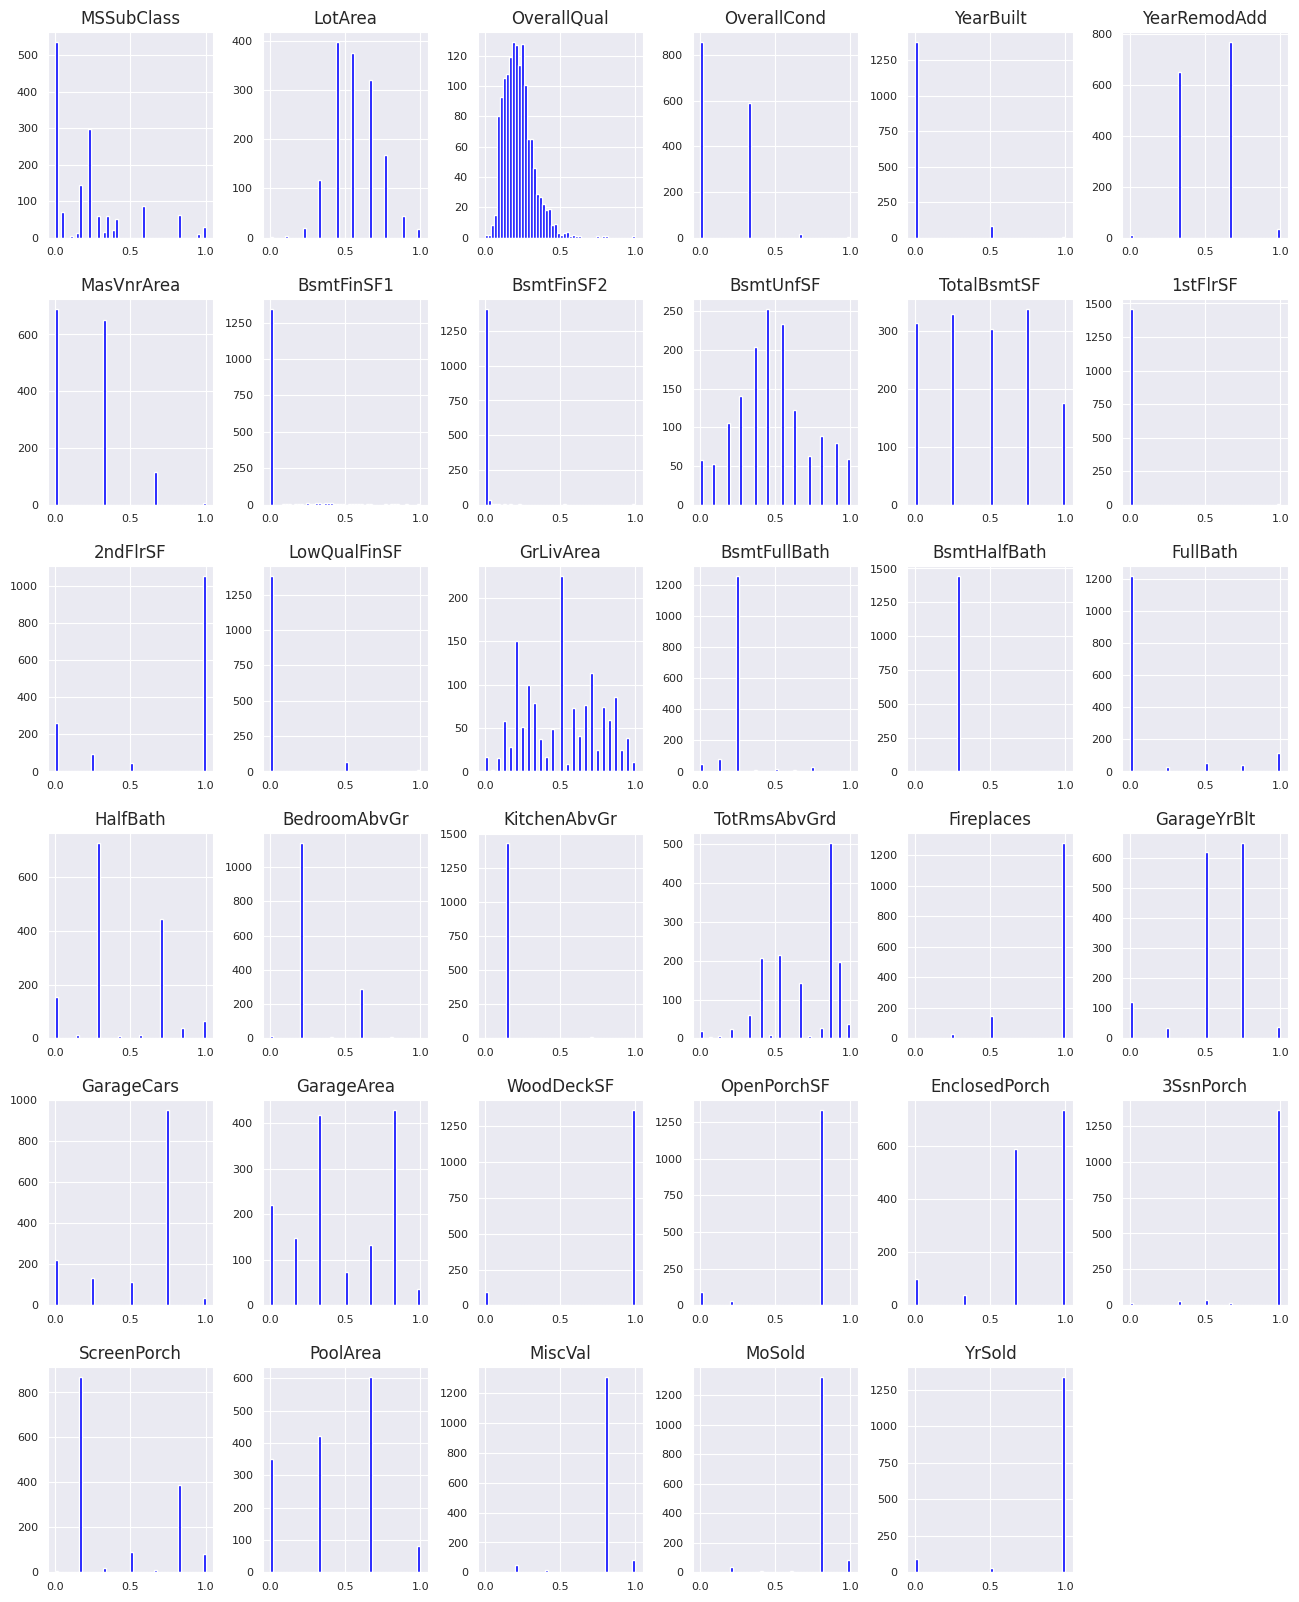

In [ ]:
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8, color='b')
plt.show()

> **COMMENT**
>> What the plot tells me

Taking a look at the histogram plots on the numerical features, I can still see that there are still some discreteness in the observations' characteristics, rather than a continuous trend. Some prominently continuous features that are perceivable are:
- MsSubClass, LotArea, OverallQual, BsmtUnfSF, GrLivArea.

Therefore, I can assume that there are still some features that can still be perceived as object such as OverallCon, GarageCars, FullBath while being displayed as a numeric values. On the other hand, some feature engineering is still up to use on a particular feature like YrSold, which can be deducted from the current year.

## Heatmap for correlation analysis:
> https://seaborn.pydata.org/generated/seaborn.heatmap.html


> Why I create & How I am using it

We can examine the 2D correlation between pairs of features using `seaborn`'s **heatmap()**. By using a monochromatic scale, we can infer the relationship and patterns of the two features from the color with the measurement scale.


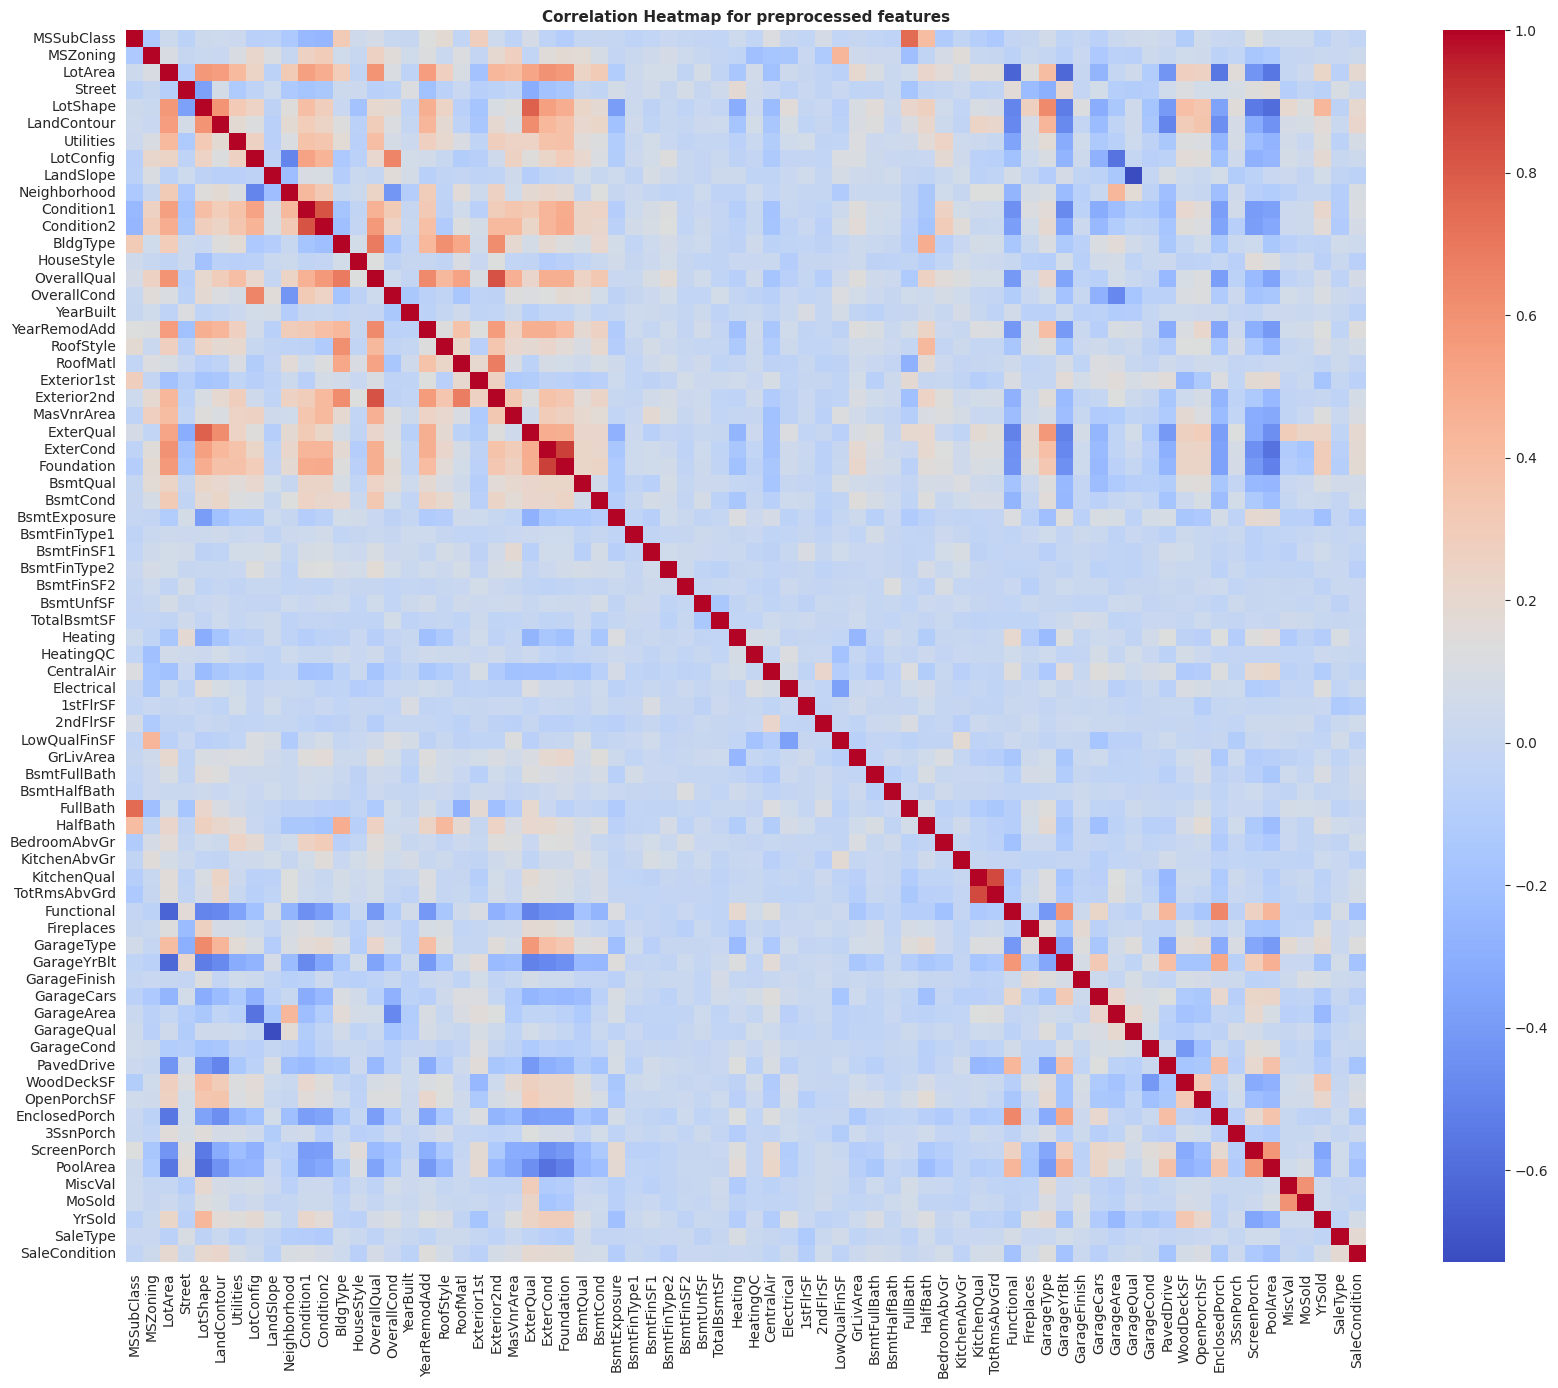

In [ ]:
plt.figure(figsize=(20, 16))
sns.heatmap(X_processed.corr(), annot=False, cmap='coolwarm') # annot = False since values are too tight
plt.title('Correlation Heatmap for preprocessed features', weight='bold', fontsize=11)
plt.show()

>**Comments**
> What the plot tells me

With 79 features, we can see a close relationship of the preceding features from **MSSubClass** to **Foundation** with the cells being represented in a warmer color tone, which says that they are highly correlated.

## Checking balanced data for classification

> Why I create & How I am using it

Now we will display the countplot for the discretized labels for classification and I will verify if the labels are balanced for training

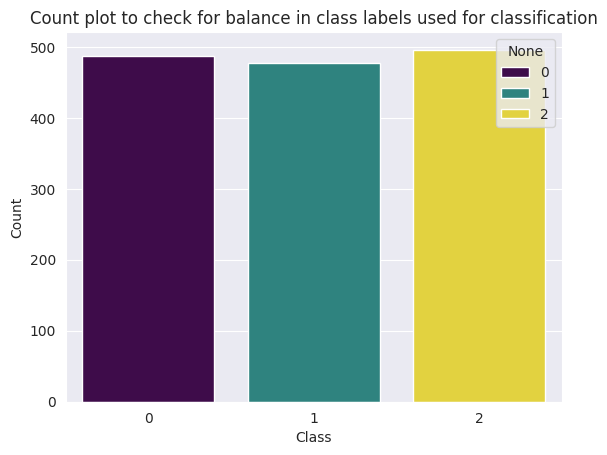

In [ ]:
sns.countplot(x=y_discretized, hue = y_discretized , palette = 'viridis')
plt.title("Count plot to check for balance in class labels used for classification")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

> **Comments**
> What the plot tells me

For classification target labels, we can see a balanced distribution of the 4 classes due to using **sklearn**'s `KBinsDiscretizer()`

# 3. Problem Statement
> Answer the following:
- Regression:
    - What column is your label and what columns are your features?
    - Does it make sense to predict the label using the features? For example, if you are estimating a house price based on the number of rooms, it makes sense because logically, the larger the number of rooms, the higher the price is.
    - How are you going to compare the performance of the regression models? MSE, histogram of residuals, ...
- Classification:
    - Specify the ranges you have used to create your classification label.
    - How are you going to compare the performance of the classification models? F-1 Score, confusion matrix, ...

# 4. Features Selection/Extraction

- In one of the lectures, we learned about a correlation plot using Seaborn. Using that plot we can see if two features are highly correlated (linearly) and hence, we can just use one of them in our model given that they are saying the same thing (kinda!)

- Or let's say, you have a feature that does not change at all. It is zero all the time! then we don't use it for our model because it does not help the model learn anything.

- One other way is to build your model step by step. Let's say in terms of classification, you build your train your model only using a subsection of features and see if the result is close to the result you get if you use all features?! The idea is to train a non-linear model with the minimum number of features with an acceptable result.

## Using dimensionality reduction technique

I will perform PCA to reduce the dimensionality and remove redundancy in some of the unncessary features



In [ ]:
from sklearn.decomposition import PCA

# Perform PCA to compress the dimensionality of our data
pca = PCA(n_components=15)
X_processed = pca.fit_transform(X_processed)
X_processed

array([[-0.56812822,  0.57703987, -0.06526374, ...,  0.0760101 ,
        -0.43629721, -0.17022209],
       [-0.1211973 , -0.01869027, -0.25859278, ...,  0.18795429,
         0.02077384,  0.44385389],
       [-0.89133848, -0.19234126,  0.04761056, ...,  0.02370792,
         0.14094923, -0.34395024],
       ...,
       [-0.3538731 ,  0.49323442, -0.01056954, ..., -0.55502906,
        -0.05957302, -0.27347772],
       [ 0.47745797,  0.17870976, -0.29090501, ...,  0.05477674,
        -0.11521287, -0.06284896],
       [ 0.26872815,  0.05080906, -0.58318824, ..., -0.08608203,
        -0.17379739, -0.21711121]])

# 5. Comparing Different Models


## 5.1. Regression Tasks
- Linear Regression
- Lasso
- Support Vector Machine
- Ensemble Random Forest

**Evaluation metrics**:
- Mean-squared errors: https://www.simplilearn.com/tutorials/statistics-tutorial/mean-squared-error#:~:text=A%20larger%20MSE%20indicates%20that,its%20central%20moment%20(mean).
- Histogram of residuals

In [ ]:
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


Linear Regression: Model score: 0.7397016255505193 | Mean squared error: 1576811191.838062
Lasso Regression: Model score: 0.7397017014139934 | Mean squared error: 1576810732.279391
Support Vector Regressor: Model score: -0.036003722021073825 | Mean squared error: 6275806628.157667
Random Forest Ensemble Regressor: Model score: 0.763799437759698 | Mean squared error: 1430833714.757737

-------------------------------------------------------------



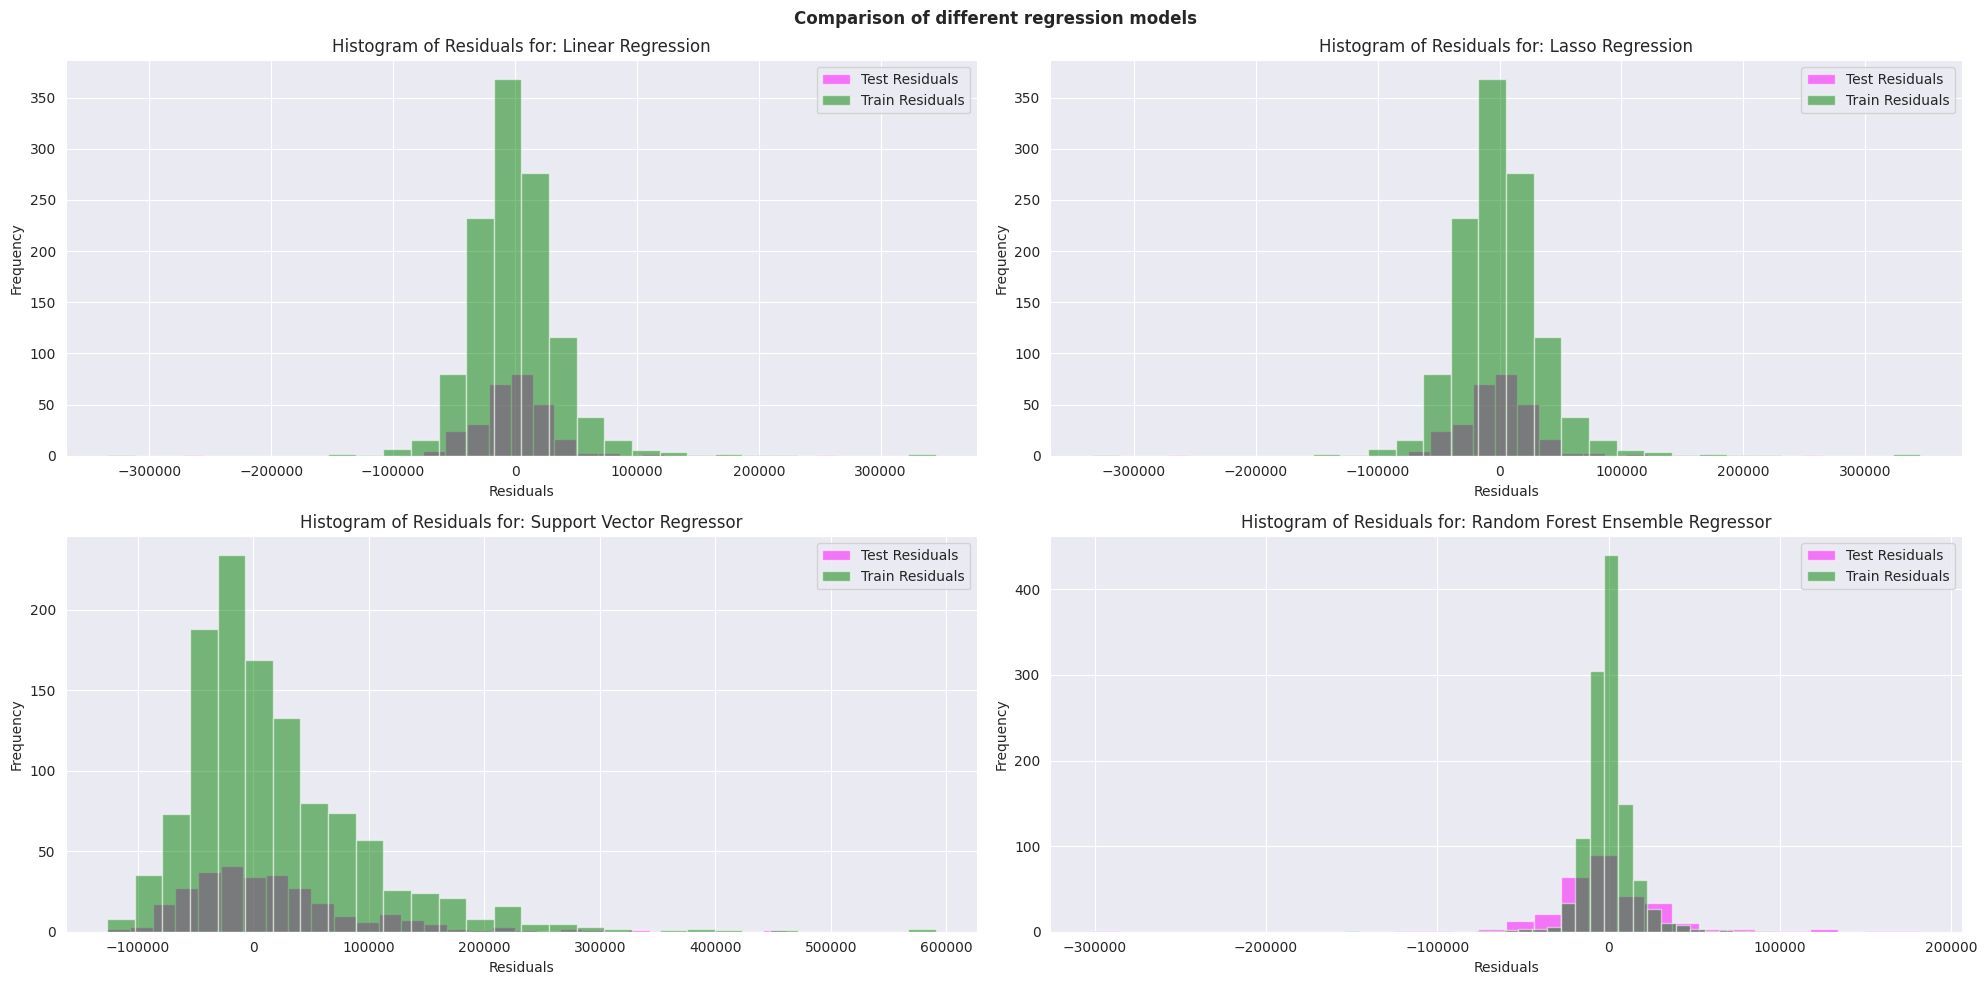

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=59)

# Initialize regression models
linear_reg = LinearRegression()
lasso_reg = Lasso(alpha=0.01, max_iter=10000, tol=1e-2, random_state=42)
# alpha=0.01 for the regularization parameter
# default of max_iter=1000 so I increased the number of iterations to reach convergence
svr = SVR(kernel='linear')
ensemble_reg = RandomForestRegressor(random_state=0)


models = {'Linear Regression': linear_reg, 'Lasso Regression': lasso_reg, 'Support Vector Regressor': svr, 'Random Forest Ensemble Regressor': ensemble_reg}

# Train models and make predictions
predictions_test = {}
predictions_train = {}
mse_scores = {}
model_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions_test[name] = model.predict(X_test)
    predictions_train[name] = model.predict(X_train)
    mse_scores[name] = mean_squared_error(y_test, predictions_test[name])
    model_scores[name] = model.score(X_test, y_test)

    # print out the evaluation metrics for the regression models
    print(f"{name}: Model score: {model.score(X_test, y_test)} | Mean squared error: {mean_squared_error(y_test, predictions_test[name])}")
print('\n-------------------------------------------------------------\n')

# Plot histogram of residuals
plt.figure(figsize=(20, 10))
for i, (name, y_pred_test) in enumerate(predictions_test.items(), 1):
    residuals_test = y_test - y_pred_test
    residuals_train = y_train - predictions_train[name]

    # Test residuals subplot
    plt.subplot(2, 2, i) # used plt.subplot() with two rows, one for rest residuals, another for training residuals
    plt.hist(residuals_test, bins=30, alpha=0.5, color='magenta', label='Test Residuals')
    plt.hist(residuals_train, bins=30, alpha=0.5, color='green', label='Train Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Residuals for: {name}')
    plt.legend()

plt.suptitle('Comparison of different regression models', weight='bold')
plt.tight_layout()
plt.show()


> **COMMENTS**
For the four estimators tested in the regression task:
 - Linear Regression, Lasso Regression, and Ensemble Random Forest Regressor display a great score; however, mean squared errors for all models are still very high, which I have yet to figure out the reason for.
 - While the Support Vector Regressor receives a very low score as well as similary unsually high MSE score

## 5.2. Classification Tasks
- Logistic Regression
- K-Nearest Neighbors Classifier
- Support Vector Classifier
- Ensemble Random Forest Classifier

**Evaluation metrics:**
- F-1 Score
- Confusion Matrix
- Classification report: encompassing the necessary metrics for classification

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        95
           1       0.65      0.61      0.63        96
           2       0.83      0.81      0.82       101

    accuracy                           0.76       292
   macro avg       0.76      0.76      0.76       292
weighted avg       0.76      0.76      0.76       292

F1 score for Logistic Regression: 0.7586279709524637
Accuracy score for Logistic Regression: 0.7602739726027398
------------------------------------------------------------

Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        95
           1       0.63      0.51      0.56        96
           2       0.80      0.87      0.83       101

    accuracy                           0.73       292
   macro avg       0.72      0.73      0.72       292
weighted avg       0.72

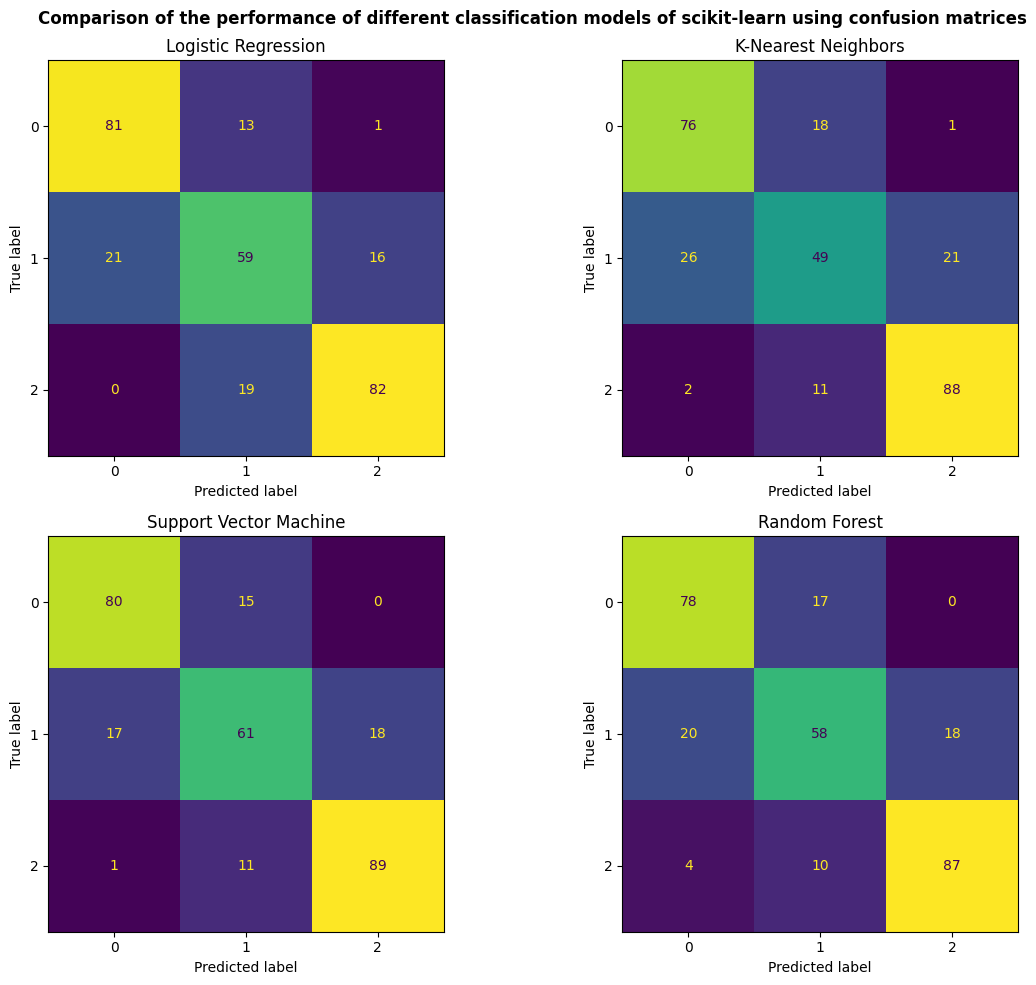

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score

sns.reset_defaults() # reset to default since the previous style implements gridlines and cause confusion matrix to be aesthetically affected
# https://seaborn.pydata.org/generated/seaborn.set_style.html#seaborn.set_style

# train-test split with the classification labels
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_discretized, test_size=0.2, random_state=59)

# Initialize the models
log_reg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
svm = SVC()
ensemble_clf = RandomForestClassifier(n_estimators=100, random_state=0)

models = {
    'Logistic Regression': log_reg,
    'K-Nearest Neighbors': knn,
    'Support Vector Machine': svm,
    'Random Forest': ensemble_clf
}

# Train models and make predictions
predictions_test = {}

# Prepare a figure with subplots for confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10)) # 2x2 grid for four models

for ax, (name, model) in zip(axes.flatten(), models.items()): # axes.flatten() to make 2x2 into 1x4 for indexing
    # Train the supervised classification models
    model.fit(X_train, y_train)
    predictions_test[name] = model.predict(X_test)

    # Perform classification report
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, predictions_test[name]))

    # Calculate F1 score
    f1 = f1_score(y_test, predictions_test[name], average='weighted')
    print(f'F1 score for {name}: {f1}')
    print(f"Accuracy score for {name}: {accuracy_score(y_test, predictions_test[name])}")
    print('------------------------------------------------------------\n')

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, predictions_test[name])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=ax, colorbar=False)  # Use the current subplot
    ax.set_title(f"{name}")

plt.suptitle('Comparison of the performance of different classification models of scikit-learn using confusion matrices', weight='bold')
plt.tight_layout()
plt.show()

> **COMMENTS**
For the models trained in our classification task:
- Logistic Regression, K-Nearest Neighbor, Support Vector Classifier, and Random Forest Classifier all received a satisfactory classification report score (precision, recall, f-1) , all of which are at least higher than 0.73. Random Forest Classifier holds the highest score ranking in most of the classification metrics

# 6. Unsupervised + Supervised
- Develop an unsupervised-supervised pipeline and apply it to the data

1. First, apply a SOM (Self-Organizing Maps) to group  data features into clusters.
2. Then, for each cluster, apply:
    + The best-performing regression model from the previous step.
    + The best-performing classification model from the previous step.

In [ ]:
# install minisom if not already
!pip install minisom
from minisom import MiniSom

## Self-Organizing Maps
- To use unsupervised learning algorithm to increase the performance of our supervised learning models, I have run through different hyperparameters to ensure the best training quantization errors, which included:
    + network layers
    + sigma
    + learning_rate

To ensure that the clustering model will provide a more meaningful feature transformation, I will perform a handmade hyperparameter tuning with values I deem noteworthy and select the most appropriate model to reapply for our supervised learning models

In [ ]:
"""
som_model = MiniSom(20, 20, 72, sigma=0.2, learning_rate=0.2)
# 10, 10 -> the dimension layer of the network
# 79 for the number of features
som_model.train(X_processed.values, 50000, verbose=True) # set the number of training iterations to 10000
"""
# Hyperparameter ranges to try
grid_sizes = [(10, 10), (15, 15), (20, 20)]
sigmas = [0.01, 0.1, 0.5]
learning_rates = [0.01, 0.1, 0.5]

# Results storage
results = []


# Iterate over hyperparameters
for grid_size in grid_sizes:
    for sigma in sigmas:
        for learning_rate in learning_rates:
            som_model = MiniSom(grid_size[0], grid_size[1], X_processed.shape[1], sigma=sigma, learning_rate=learning_rate)
            som_model.train(X_processed, 15000 , verbose=True)  # Use a fixed number of iterations for consistency

            # Calculate quantization error
            q_error = som_model.quantization_error(X_processed)

            # Store the results
            results.append({
                'grid_size': grid_size,
                'sigma': sigma,
                'learning_rate': learning_rate,
                'quantization_error': q_error
            })

# Find the best hyperparameters
best_result = min(results, key=lambda x: x['quantization_error'])

# Display results
print("Best Hyperparameters:")
print(f"Grid Size: {best_result['grid_size']}")
print(f"Sigma: {best_result['sigma']}")
print(f"Learning Rate: {best_result['learning_rate']}")
print(f"Quantization Error: {best_result['quantization_error']}")


 [ 15000 / 15000 ] 100% - 0:00:00 left 
 quantization error: 0.9018418422516882
 [ 15000 / 15000 ] 100% - 0:00:00 left 
 quantization error: 0.7836134851745935
 [ 15000 / 15000 ] 100% - 0:00:00 left 
 quantization error: 0.754966460543375
 [ 15000 / 15000 ] 100% - 0:00:00 left 
 quantization error: 0.9137695436668685
 [ 15000 / 15000 ] 100% - 0:00:00 left 
 quantization error: 0.7805693952861729
 [ 15000 / 15000 ] 100% - 0:00:00 left 
 quantization error: 0.7501969191021738
 [ 15000 / 15000 ] 100% - 0:00:00 left 
 quantization error: 0.9115907127094952
 [ 15000 / 15000 ] 100% - 0:00:00 left 
 quantization error: 0.7818403940833789
 [ 15000 / 15000 ] 100% - 0:00:00 left 
 quantization error: 0.7467326308584447
 [ 15000 / 15000 ] 100% - 0:00:00 left 
 quantization error: 0.8981773855765642
 [ 15000 / 15000 ] 100% - 0:00:00 left 
 quantization error: 0.7140685553210946
 [ 15000 / 15000 ] 100% - 0:00:00 left 
 quantization error: 0.6734264986826862
 [ 15000 / 15000 ] 100% - 0:00:00 left 
 

In [ ]:
som_model = MiniSom(*best_result['grid_size'], X_processed.shape[1], sigma=best_result['sigma'], learning_rate=best_result['learning_rate'])

som_model.train(X_processed, 15000 , verbose=True)  # Use a fixed number of iterations for consistency

som_model._weights

 [ 15000 / 15000 ] 100% - 0:00:00 left 
 quantization error: 0.584408487275815


array([[[-0.17150204, -0.41486826,  0.14011503, ...,  0.10351189,
          0.369544  , -0.08720517],
        [-0.20420882,  0.10174567, -0.0151614 , ..., -0.02019579,
          0.00352091,  0.07236904],
        [ 0.48753469, -0.59663514,  0.21795711, ..., -0.19076428,
          0.36388099,  0.63858903],
        ...,
        [ 0.53864294, -0.7820902 , -0.26486432, ...,  0.11146485,
          0.24660882, -0.12697087],
        [ 0.86218651, -0.43423753,  0.61863616, ..., -0.4608873 ,
         -0.31297248, -0.09226747],
        [ 0.74046025, -0.43131753,  0.55997023, ...,  0.26523231,
         -0.20469236, -0.23014403]],

       [[-0.85961952, -0.17711308,  0.19076462, ...,  0.16517151,
          0.02540409, -0.01748798],
        [-0.93608179,  0.69310647,  0.28113516, ...,  0.01632717,
          0.21441135, -0.12553146],
        [-0.51111042,  0.19440192,  0.16272442, ...,  0.01728096,
         -0.03656442,  0.10108278],
        ...,
        [ 0.79527783,  0.18403535, -0.61664996, ..., -

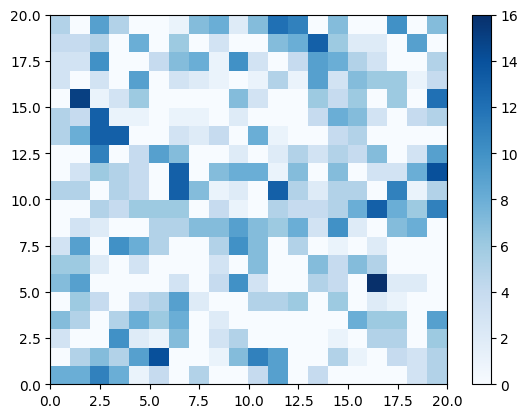

In [ ]:
activation=som_model.activation_response(X_processed)
plt.pcolor(activation.T, cmap='Blues')
plt.colorbar()
plt.show()

## Re-apply for the best performing regression and classification models

### Regression Model

In [ ]:
# train-split test
X_train, X_test, y_train, y_test = train_test_split(som_model.quantization(X_processed), y, test_size=0.2, random_state=59)
# train the model again
ensemble_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
# Provide the evaluation metrics for this regresison model
print(f"Random Forest Ensemble Model score: {ensemble_reg.score(X_test, y_test)} | Mean squared error: {mean_squared_error(y_test, ensemble_reg.predict(X_test))}")


Random Forest Ensemble Model score: 0.6097505385612136 | Mean squared error: 2364016754.6450925


### Classification Model

In [ ]:
# train-split test
X_train, X_test, y_train, y_test = train_test_split(som_model.quantization(X_processed), y_discretized, test_size=0.2, random_state=59)
# train the model again
ensemble_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.77      0.75        95
           1       0.60      0.47      0.53        96
           2       0.75      0.87      0.81       101

    accuracy                           0.71       292
   macro avg       0.69      0.70      0.69       292
weighted avg       0.69      0.71      0.70       292



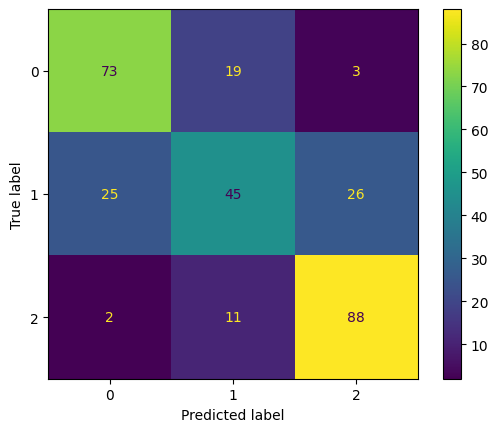

In [ ]:
print("Classification Report:\n")
print(classification_report(y_test, ensemble_clf.predict(X_test)))

# confusion matrix
cm = confusion_matrix(y_test, ensemble_clf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ensemble_clf.classes_)
disp.plot()
plt.show()

# 7. Conclusion and result justification

For the given Unsupervised + Supervised Learning method, I have not received a noticeable improvement in the model performance:
- Random Forest Regressor Model receives a lower score and worse performance metrics even enhanced with using Self-organising Maps. In overall, the monstrously high mean squared error indicates that there are inherent disparity in my data preprocessing and cleaning step.
- For the Random Forest Classifier Model receives even a lower classification metrics even with unsupervised self-organizing maps as well.

## Preference on the model

- Using an ensemble random forest model ensures the most since using ensemble with the random forest method can randomize the estimators, and using their training result, the model can give out a more weighted approach

## Issues, Limitations, and Further Improvement

Some interpretations of this problem that I can detect are:
- Feature Engineering, there are still many more feature engineering steps that I could have taken, for example, `YearBuilt` and `YrSold` have a more datetime manner, I could have deduced them as numerical values representing the number of years since selling or building, therefore, we can infer a more meaningful learning method
- Same with Feature Engineering, I can also perform some polynomial transformation, since the problem can be represented as a non-linearly separable problem
- While hyperparameter tuning for each model is also vital for the training procedure, I still think there are still more preprocessing steps available for extracting the most information, which revolves around understanding domain knowledge of housing prices.

## Recapitulate and Reflect
For this project, I get to approach a practical data science project and stumble upon many issues as I was diving into every part of the data analysis procedure. For this course, I have learnt the most rudimentary concepts in machine learning and artificial intelligence concepts, their basic implementations, and the most general overarching sense of applying machine learning algorithms to perceive data as valuable information for many business-related and scientific-based decisions. However, I think I have yet to do many of these projects before, and I feel that there are much points in preprocessing data and feature engineering. The most visible lesson I got from this project is the unreasonably high Mean-squared error metrics that I received upon predicting the test variables. Remembering some of the data scientists and machine learning engineers that I have talked before, they said that besides understanding the underlying mathematical mechanism of each algorithm, understanding each dataset's characteristics and compatibility with the most appropriate algorithm and knowing how to transform the data into meaningful training variables are also important nonetheless.


# References
## Dataset and overview
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

## Data Quality

## Resampling

## Regression Task
> Choosing regression models to compare, carry out training and validation, post-training evaluation

## Classification Task
> Choosing regression models to compare, carry out training and validation, post-training evaluation
- Preprocessing - Feature Discretization: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_classification.html
- Preprocessing - The Importance of Feature Scaling: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
- Classifier Comparison: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

# ... suggestion to get started !!!
---

### 1. **First Look at the Data**

   - **Load the Data**: Import the dataset into a pandas DataFrame.
   - **Basic Info**: Use `.head()`, `.info()`, and `.describe()` to understand the shape, data types, summary statistics, and detect missing values.
   - **Check for Duplicates**: Use `df.duplicated().sum()` to identify and optionally remove duplicate entries.

   ```python
   import pandas as pd

   df = pd.read_csv("data.csv")
   print(df.head())
   print(df.info())
   print(df.describe())
   ```

### 2. **Preprocessing the Data**

   - **Handling Missing Values**:
     - For numerical columns, fill with median, mean, or use interpolation.
     - For categorical columns, use mode or designate as a new category (`'Unknown'`).
   - **Encoding Categorical Variables**:
     - Use **One-Hot Encoding** for nominal categories (e.g., `pd.get_dummies()`).
     - **Label Encoding** for ordinal categories.
   - **Scaling/Normalization**:
     - Standardize or normalize numerical features using **StandardScaler** or **MinMaxScaler** (important for algorithms sensitive to feature scales, like SVM or KNN).
   - **Feature Engineering** (if applicable):
     - Generate new features based on domain knowledge (e.g., age of a house, price per square foot).

   ```python
   from sklearn.preprocessing import StandardScaler

   # Fill missing values
   df['column'].fillna(df['column'].median(), inplace=True)

   # One-hot encoding
   df = pd.get_dummies(df, columns=['categorical_feature'])

   # Scaling
   scaler = StandardScaler()
   df[['feature1', 'feature2']] = scaler.fit_transform(df[['feature1', 'feature2']])
   ```

### 3. **Exploratory Data Analysis (EDA)**

   - **Distribution Analysis**: Plot histograms and box plots to examine distributions and identify outliers.
   - **Correlation Analysis**:
     - Use a heatmap to inspect correlations among features and with the target variable. Correlated features could indicate multicollinearity issues.
   - **Visualize Relationships**: Scatter plots, pair plots, and bar charts to explore relationships between features and the target.
   - **Feature Importance**:
     - If the dataset is labeled, try using `feature_importances_` from a tree-based model like RandomForest for preliminary feature selection.

   ```python
   import seaborn as sns
   import matplotlib.pyplot as plt

   # Heatmap for correlation
   plt.figure(figsize=(10, 8))
   sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

   # Boxplot for feature distribution
   sns.boxplot(x='feature', data=df)
   ```

### 4. **Splitting the Data**

   - Split the data into training and testing sets, typically 70-80% for training and 20-30% for testing, to ensure robust evaluation.
   - Consider **cross-validation** to get a more reliable estimate of model performance.

   ```python
   from sklearn.model_selection import train_test_split

   X = df.drop(columns=['target'])
   y = df['target']

   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   ```

### 5. **Model Training and Evaluation**

   - **Train Multiple Models**:
     - Try multiple models (e.g., Linear Regression, Decision Trees, Random Forest, XGBoost for regression; Logistic Regression, K-Nearest Neighbors, SVM, Random Forest for classification).
   - **Hyperparameter Tuning**:
     - Use Grid Search or Random Search to find optimal parameters for each model.
   - **Evaluate Models**:
     - For regression, use metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R².
     - For classification, use Accuracy, Precision, Recall, F1-score, ROC-AUC.

   ```python
   from sklearn.ensemble import RandomForestClassifier
   from sklearn.metrics import accuracy_score, classification_report

   # Train and evaluate Random Forest
   model = RandomForestClassifier()
   model.fit(X_train, y_train)
   y_pred = model.predict(X_test)

   print("Accuracy:", accuracy_score(y_test, y_pred))
   print(classification_report(y_test, y_pred))
   ```

### 6. **Model Comparison**

   - **Select Best Model**:
     - Compare models using the evaluation metrics from the previous step.
     - Look at overall performance but also focus on specific metrics important to your task (e.g., F1 score if class balance is an issue).
   - **Visualization**:
     - Plot the performance metrics (e.g., bar chart of F1 scores) for easy comparison.
   - **Confusion Matrix (Classification)**:
     - Visualize the confusion matrix to assess where each model misclassifies.

   ```python
   import matplotlib.pyplot as plt

   # Plot metric comparisons for multiple models
   models = ['Logistic Regression', 'Random Forest', 'SVM']
   accuracy = [0.75, 0.85, 0.80]  # Example accuracies for each model

   plt.bar(models, accuracy, color=['blue', 'green', 'red'])
   plt.xlabel('Model')
   plt.ylabel('Accuracy')
   plt.title('Model Comparison')
   plt.show()
   ```

### 7. **Conclusions and Final Model Selection**

   - Summarize findings and justify the choice of the final model.
   - Comment on which features or preprocessing steps contributed most to the performance.
   - If possible, **interpret the model** (e.g., using SHAP or LIME for feature contributions in complex models).

---

This workflow ensures that you preprocess and analyze the data carefully, try multiple models, and select the best based on performance metrics suitable for the task. Let me know if you need details on a specific step!